Η εκτίμηση θ1 για την κλάση ω1: 2.585
Η εκτίμηση θ2 για την κλάση ω2: -3.146


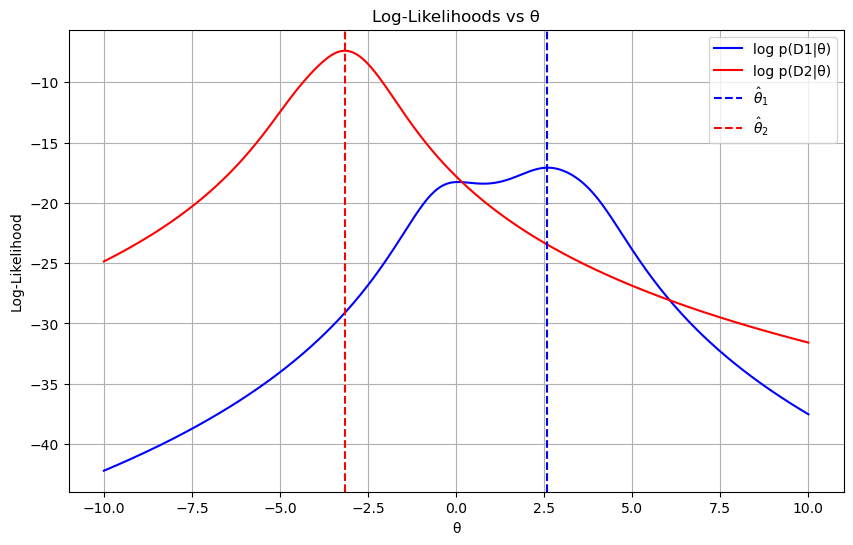

In [6]:
# Christos Alexopoulos(10618), Panagiotis Koutris(10671), Team 4
# Solution for PART A

# Question 1
import numpy as np
import matplotlib.pyplot as plt

class Classifier_ML:

    def __init__(self, D1, D2):
        self.D1 = D1
        self.D2 = D2

    # Calculate pdf p(x|θ)
    def pdf(self, x, theta):
        return 1 / (np.pi * (1 + (x - theta) ** 2))

    # Calculate log-likelihood log(p(D|θ))
    def log_likelihood(self, D, theta):
        return np.sum(np.log(self.pdf(D, theta)))

    # Calculate θ that maximizes log_likelihood log(p(D|θ))
    def find_max_likelihood_theta(self, D, theta_values):
        log_likelihoods = [self.log_likelihood(D, theta) for theta in theta_values]
        max_theta = theta_values[np.argmax(log_likelihoods)]
        return max_theta, log_likelihoods

    # plot log(p(D1|θ)) and log(p(D2|θ))
    def plot_log_likelihoods(self, theta_values, log_likelihood_1, log_likelihood_2, best_theta_1, best_theta_2):
        plt.figure(figsize=(10, 6))
        plt.plot(theta_values, log_likelihood_1, label='log p(D1|θ)', color='blue')
        plt.plot(theta_values, log_likelihood_2, label='log p(D2|θ)', color='red')
        plt.axvline(x=best_theta_1, color='blue', linestyle='--', label=r"$\hat{\theta}_1$")
        plt.axvline(x=best_theta_2, color='red', linestyle='--', label=r"$\hat{\theta}_2$")
        plt.title('Log-Likelihoods vs θ')
        plt.xlabel('θ')
        plt.ylabel('Log-Likelihood')
        plt.legend()
        plt.grid()
        plt.show()

    # Classify data into ω1 or ω2
    def predict(self, D, a_priori_1, a_priori_2, best_theta_1, best_theta_2):
        for x in D:
            # Calculate g
            g = np.log((1 + (x - best_theta_2) ** 2) / (1 + (x - best_theta_1) ** 2)) + np.log(a_priori_1) + np.log(a_priori_2)
            if g > 0:
                print(f"g is {g} and sample {x} belongs to class ω1")
            elif g < 0:
                print(f"g is {g} and sample {x} belongs to class ω2")
            else:
                print(f"g is {g}")
        return "Classification done"

    # Plot g(x)
    def plot_g(self, D, a_priori_1, a_priori_2, best_theta_1, best_theta_2):
        x_values = np.linspace(min(D) - 1, max(D) + 1, 500)  # Range for plotting g(x)
        g_values = [
            np.log((1 + (x - best_theta_2) ** 2) / (1 + (x - best_theta_1) ** 2)) + np.log(a_priori_1) + np.log(a_priori_2)
            for x in x_values
        ]

        plt.figure(figsize=(10, 6))
        plt.plot(x_values, g_values, label='g(x)', color='green')
        plt.axhline(y=0, color='black', linestyle='--', label='g(x) = 0')
        plt.title('g(x) vs x')
        plt.xlabel('x')
        plt.ylabel('g(x)')
        plt.legend()
        plt.grid()
        plt.show()


# Data
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

# Initialize classifier
classifier = Classifier_ML(D1, D2)

# Initialize theta values
theta_values = np.linspace(-10, 10, 500)

# Maximum likelihood calculation for each class
best_theta_1, log_likelihood_1 = classifier.find_max_likelihood_theta(D1, theta_values)
best_theta_2, log_likelihood_2 = classifier.find_max_likelihood_theta(D2, theta_values)

print(f"Η εκτίμηση θ1 για την κλάση ω1: {best_theta_1:.3f}")
print(f"Η εκτίμηση θ2 για την κλάση ω2: {best_theta_2:.3f}")

# Plot log_likelihood log(p(D|θ))
classifier.plot_log_likelihoods(theta_values, log_likelihood_1, log_likelihood_2, best_theta_1, best_theta_2)





The classifier results: (D1)
g is 2.1338414396284775 and sample 2.8 belongs to class ω1
g is -1.5631253353177552 and sample -0.4 belongs to class ω2
g is -2.0643540718048445 and sample -0.8 belongs to class ω2
g is 1.9303777409198637 and sample 2.3 belongs to class ω1
g is -1.4386530427123185 and sample -0.3 belongs to class ω2
g is 1.7172787716272868 and sample 3.6 belongs to class ω1
g is 1.3730622531847718 and sample 4.1 belongs to class ω1
Classification done
The classifier results: (D2)
g is -4.309029610582341 and sample -4.5 belongs to class ω2
g is -4.9581872192690195 and sample -3.4 belongs to class ω2
g is -4.918517212316285 and sample -3.1 belongs to class ω2
g is -4.865073581660064 and sample -3.0 belongs to class ω2
g is -4.087802941203727 and sample -2.3 belongs to class ω2
Classification done


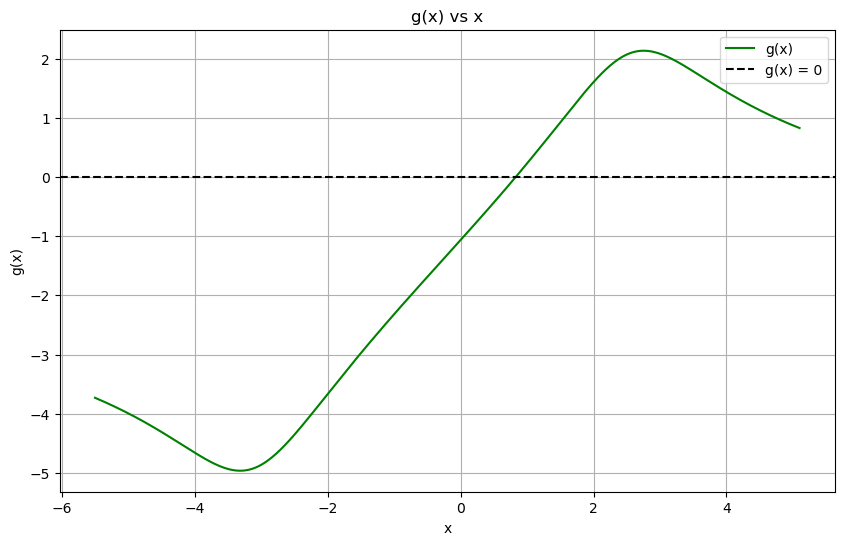

In [8]:
# Question 2
print(f"The classifier results: (D1)")
print(f"{classifier.predict(D1, 7 / 12, 5 / 12, best_theta_1, best_theta_2)}")
print(f"The classifier results: (D2)")
print(f"{classifier.predict(D2, 7 / 12, 5 / 12, best_theta_1, best_theta_2)}")

# Plot g(x)
classifier.plot_g(np.concatenate((D1, D2)), 7 / 12, 5 / 12, best_theta_1, best_theta_2)


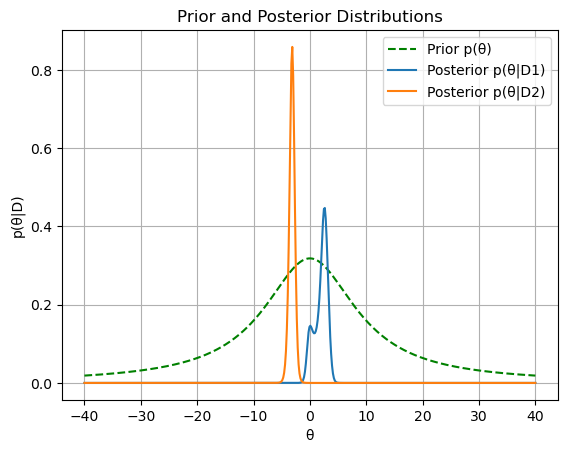

In [10]:
# Christos Alexopoulos(10618), Panagiotis Koutris(10671), Team 4
# Solution for PART B

# Question 1
import numpy as np
import matplotlib.pyplot as plt

class Classifier_BE:

    def __init__(self, D1, D2):
        self.D1 = D1
        self.D2 = D2

    # Calculate pdf p(x|θ)
    def pdf(self, x, theta):
        return 1 / (np.pi * (1 + (x - theta) ** 2))

    # Calculate Prior probability p(θ)
    def prior_pdf(self, theta):
        return 1 / (np.pi * (1 + (theta / 10) ** 2))

    # Calculate Likelihood p(D|θ) for a given θ
    def likelihood(self, D, theta):
        return np.prod(1 / (np.pi * (1 + (D - theta) ** 2)))

    # Calculate Posterior probability p(θ|D)
    def posterior(self, D, theta_values):
        prior = self.prior_pdf(theta_values)  # Prior p(θ)
        likelihood_values = np.array([self.likelihood(D, theta) for theta in theta_values])  # Likelihood p(D|θ)

        # Compute the unnormalized posterior p(θ|D)
        posterior_values = likelihood_values * prior

        # Normalize posterior by integrating using trapezoidal rule
        integral = np.trapz(posterior_values, theta_values)  # Approximate the integral
        normalized_posterior = posterior_values / integral  # Normalize to get p(θ|D)

        return normalized_posterior

    # Calculate Plot posterior probability p(θ|D)
    def plot_posterior(self, D, theta_values, label):
        posterior_D = self.posterior(D, theta_values)

        # Plotting p(θ|D)
        plt.plot(theta_values, posterior_D, label=label)
        plt.xlabel('θ')
        plt.ylabel('p(θ|D)')
        plt.legend()
        plt.grid(True)

    # Plot all distributions (Prior + Posteriors)
    def plot_all_distributions(self, D1, D2, theta_values):
        # Plot prior
        prior_D = self.prior_pdf(theta_values)
        plt.plot(theta_values, prior_D, label='Prior p(θ)', color='green', linestyle='--')

        # Plot posteriors
        self.plot_posterior(D1, theta_values, label='Posterior p(θ|D1)')
        self.plot_posterior(D2, theta_values, label='Posterior p(θ|D2)')

        # Title and display
        plt.title('Prior and Posterior Distributions')
        plt.legend()
        plt.grid(True)
        plt.show()

    # calculate p(x|D)
    def posterior_D(self, x, theta_values, D):
        return np.trapz(self.pdf(x, theta_values)*self.posterior(D, theta_values), theta_values)

    # Predict and calculate h(x)
    def predict(self, D1, D2, a_priori_1, a_priori_2, theta_values):
        all_data = np.concatenate((D1, D2))
        for x in all_data:
            h = np.log(self.posterior_D(x, theta_values, D1)) - np.log(self.posterior_D(x, theta_values, D2)) + np.log(a_priori_1) - np.log(a_priori_2)
            print(f"For x {x} H is : {h}")
        return "Done"

    # Plot h(x)
    def plot_h(self, D1, D2, a_priori_1, a_priori_2, theta_values):
        all_data = np.concatenate((D1, D2))
        x_values = np.linspace(min(all_data) - 1, max(all_data) + 1, 500)
        h_values = [
            np.log(self.posterior_D(x, theta_values, D1)) - np.log(self.posterior_D(x, theta_values, D2))
            + np.log(a_priori_1) - np.log(a_priori_2)
            for x in x_values
        ]

        # Plotting h(x)
        plt.figure(figsize=(10, 6))
        plt.plot(x_values, h_values, label='h(x)', color='green')
        plt.axhline(y=0, color='black', linestyle='--', label='h(x) = 0')
        plt.title('h(x) vs x')
        plt.xlabel('x')
        plt.ylabel('h(x)')
        plt.legend()
        plt.grid(True)
        plt.show()


# Data
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

# Initialize classifier
classifier = Classifier_BE(D1, D2)

# Theta values for posterior computation (using a range -40 to 40)
theta_values = np.linspace(-40, 40, 500)

# Plot all distributions in one graph
classifier.plot_all_distributions(D1, D2, theta_values)




For x 2.8 H is : 3.410182266827393
For x -0.4 H is : 1.0650497112547765
For x -0.8 H is : 0.5269999084396422
For x 2.3 H is : 3.2744770815157294
For x -0.3 H is : 1.1855149685862565
For x 3.6 H is : 3.2682062336418882
For x 4.1 H is : 3.0220484542865726
For x -4.5 H is : -2.3907450575184166
For x -3.4 H is : -2.6761760182262395
For x -3.1 H is : -2.5672586027247544
For x -3.0 H is : -2.507350803774954
For x -2.3 H is : -1.7851050317268937


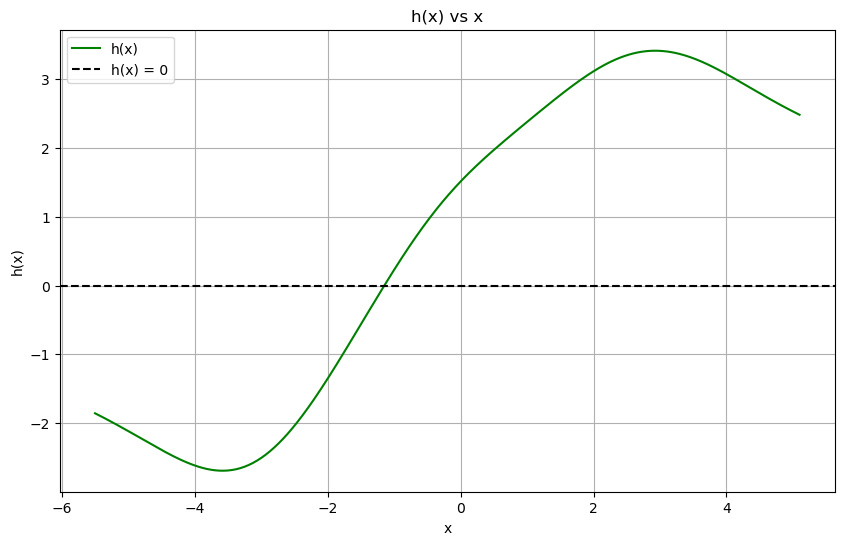

In [12]:
# Question 2

# Calculate h values
classifier.predict(D1, D2, 7/12, 5/12, theta_values)

# Plot h(x)
classifier.plot_h(D1, D2, 7/12, 5/12, theta_values)

In [48]:
# Christos Alexopoulos(10618), Panagiotis Koutris(10671), Team 4
# Solution for PART C

#Part 1: Decision Tree Classifier

# Part 1 Question 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

# Load iris dataset
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Split the data: 50% training, 50% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

def plot_decision_boundaries(X, y, model, title, x_label, y_label):
    """
    Parameters:
    - X: Feature matrix
    - y: Target labels
    - model: Trained classifier model
    - title: Plot title
    - x_label: Label for the x-axis
    - y_label: Label for the y-axis
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k',
                cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))

    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF0000', markersize=10, label='Setosa'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#00FF00', markersize=10, label='Versicolor'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#0000FF', markersize=10, label='Virginica')],
        loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout()
    plt.show()

# Find the best depth for Decision Tree
best_depth_dt = 0
best_accuracy_dt = 0
for depth in range(1, 10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Decision Tree Accuracy: {accuracy} with depth: {depth}")

    if accuracy > best_accuracy_dt:
        best_accuracy_dt = accuracy
        best_depth_dt = depth

print(f"Best Decision Tree Accuracy: {best_accuracy_dt} with Depth: {best_depth_dt}")





Decision Tree Accuracy: 0.64 with depth: 1
Decision Tree Accuracy: 0.7733333333333333 with depth: 2
Decision Tree Accuracy: 0.7866666666666666 with depth: 3
Decision Tree Accuracy: 0.7733333333333333 with depth: 4
Decision Tree Accuracy: 0.7733333333333333 with depth: 5
Decision Tree Accuracy: 0.7733333333333333 with depth: 6
Decision Tree Accuracy: 0.7333333333333333 with depth: 7
Decision Tree Accuracy: 0.7333333333333333 with depth: 8
Decision Tree Accuracy: 0.7333333333333333 with depth: 9
Best Decision Tree Accuracy: 0.7866666666666666 with Depth: 3


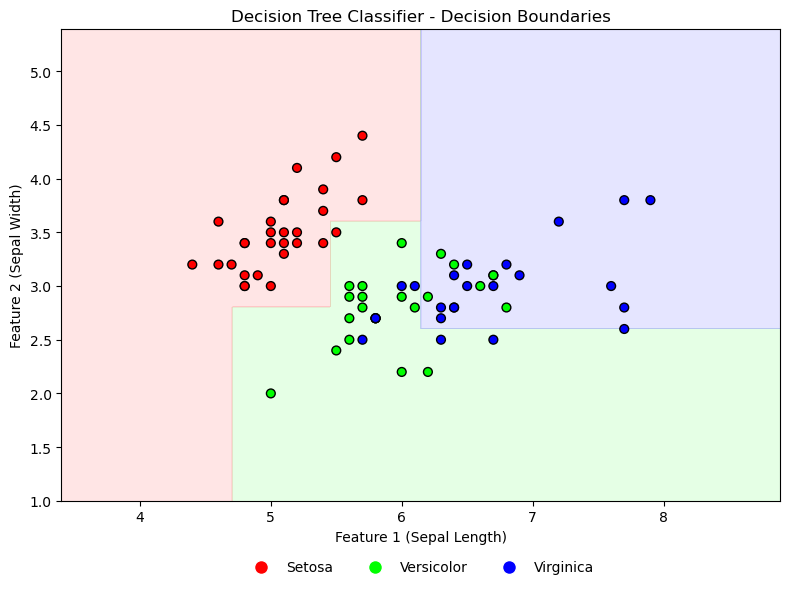

In [58]:
# Part 1 Question 2

# Train and plot Decision Tree with best depth
dt_model = DecisionTreeClassifier(max_depth=best_depth_dt, random_state=42)
dt_model.fit(X_train, y_train)
plot_decision_boundaries(
    X_test, y_test, dt_model,
    title="Decision Tree Classifier - Decision Boundaries",
    x_label="Feature 1 (Sepal Length)",
    y_label="Feature 2 (Sepal Width)"
)


In [52]:
# Part 2: Random Forest Classifier



# Part 2 Question 1



# Find the best depth for Random Forest
best_depth_rf = 0
best_accuracy_rf = 0
n_trees = 100
for depth in range(1, 10):
    rf_model = RandomForestClassifier(
        n_estimators=n_trees, max_depth=depth, bootstrap=True, max_samples=0.5, random_state=42
    )
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Random Forest Accuracy: {accuracy} with depth: {depth}")

    if accuracy > best_accuracy_rf:
        best_accuracy_rf = accuracy
        best_depth_rf = depth

print(f"Best Random Forest Accuracy: {best_accuracy_rf} with Depth: {best_depth_rf}")





Random Forest Accuracy: 0.76 with depth: 1
Random Forest Accuracy: 0.8266666666666667 with depth: 2
Random Forest Accuracy: 0.8 with depth: 3
Random Forest Accuracy: 0.8 with depth: 4
Random Forest Accuracy: 0.7866666666666666 with depth: 5
Random Forest Accuracy: 0.7866666666666666 with depth: 6
Random Forest Accuracy: 0.7866666666666666 with depth: 7
Random Forest Accuracy: 0.7733333333333333 with depth: 8
Random Forest Accuracy: 0.7866666666666666 with depth: 9
Best Random Forest Accuracy: 0.8266666666666667 with Depth: 2


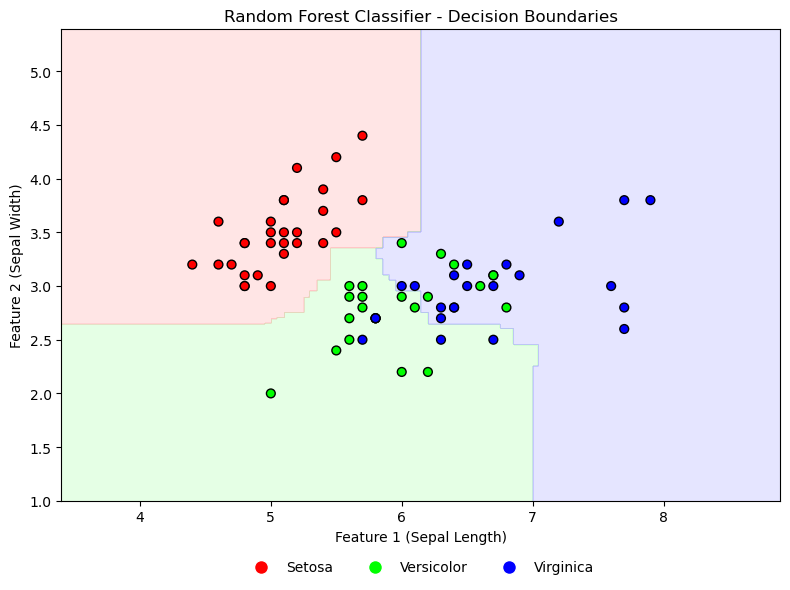

In [54]:
# Part 2 Question 2
# Train and plot Random Forest with best depth
rf_model = RandomForestClassifier(
    n_estimators=n_trees, max_depth=best_depth_rf, bootstrap=True, max_samples=0.5, random_state=42
)
rf_model.fit(X_train, y_train)
plot_decision_boundaries(
    X_test, y_test, rf_model,
    title="Random Forest Classifier - Decision Boundaries",
    x_label="Feature 1 (Sepal Length)",
    y_label="Feature 2 (Sepal Width)"
)


In [56]:

# Part 2  Question 3 

# Effect of γ on Random Forest Performance

gamma_values = [0.1, 0.3, 0.5, 0.7, 1.0] 
best_accuracy_gamma = 0
best_gamma = 0

print("Effect of γ (max_samples) on Random Forest Classifier:")

for gamma in gamma_values:
    rf_model = RandomForestClassifier(
        n_estimators=100, max_depth=best_depth_rf, bootstrap=True, max_samples=gamma, random_state=42
    )
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"γ: {gamma}, Accuracy: {accuracy:.4f}")

    # Keep track of the best gamma value
    if accuracy > best_accuracy_gamma:
        best_accuracy_gamma = accuracy
        best_gamma = gamma

print(f"Best γ: {best_gamma} with Accuracy: {best_accuracy_gamma:.4f}")

Effect of γ (max_samples) on Random Forest Classifier:
γ: 0.1, Accuracy: 0.8000
γ: 0.3, Accuracy: 0.8133
γ: 0.5, Accuracy: 0.8267
γ: 0.7, Accuracy: 0.8267
γ: 1.0, Accuracy: 0.8267
Best γ: 0.5 with Accuracy: 0.8267
